In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup


df = pd.read_csv(r"/content/Input.xlsx - Sheet1.csv")

def df_article_title(i):
  final_article_title = []
  final_article_text = []
  #for i in df['URL']:
  webUrl = requests.get(i)
  soup = BeautifulSoup(webUrl.content, 'html.parser')

  article_title = soup.title.text
  return article_title
  final_article_title.append(article_title)
  article_text = soup.find('div', class_='td-post-content tagdiv-type')
  if article_text == None:
      article_text = ' '.join([i.text for i in soup.findAll('div', class_='tdb-block-inner td-fix-index')])
      #print(f'{k}st URL')
      final_article_text.append(article_text)
  else:
      article_text = soup.find('div', class_='td-post-content tagdiv-type')
      #print(f'{k}st URL')
      final_article_text.append(article_text.text)


def df_article_text(i):
  final_article_title = []
  final_article_text = []
  #for i in df['URL']:
  webUrl = requests.get(i)
  soup = BeautifulSoup(webUrl.content, 'html.parser')

  article_title = soup.title.text
  final_article_title.append(article_title)
  article_text = soup.find('div', class_='td-post-content tagdiv-type')
  if article_text == None:
      article_text = ' '.join([i.text for i in soup.findAll('div', class_='tdb-block-inner td-fix-index')])
      #print(f'{k}st URL')
      final_article_text.append(article_text)
      return article_text
  else:
      article_text = soup.find('div', class_='td-post-content tagdiv-type')
      #print(f'{k}st URL')
      final_article_text.append(article_text.text)
      return article_text.text

In [2]:
df['Title'] = df['URL'].apply(lambda x: df_article_title(x))

In [3]:
df['Text'] = df['URL'].apply(lambda x: df_article_text(x))

In [4]:
df

,URL_ID,URL,Title,Text
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,\nWe have seen a huge development and dependen...
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,"\nThroughout history, from the industrial revo..."
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",\nIntroduction\nIn the span of just a few deca...
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,"\nThe way we live, work, and communicate has u..."
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,\nThe year 2040 is poised to witness a continu...
...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,"\nEpidemics, in general, have both direct and ..."
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,\nCOVID 19 has bought the world to its knees. ...
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,\nHandicrafts is an art of making crafts by ha...
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,"Friday, December 29, 2023 Sign in / Join S..."


## Text Preprocessing

In [5]:
df['Text'] = df['Text'].str.lower()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# check sentences and replace punctions with spaces
df['Text'] = df['Text'].str.replace('[^\w\s]', '')

<ipython-input-8-659bada2a1b4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', '')


In [9]:
df['Text'] = df['Text'].str.replace('\n', '')

In [10]:
# save the downloaded stopwords
sw = stopwords.words('english')

In [11]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [12]:
# to find how many times words counts
temp_df = pd.Series(' '.join(df['Text']).split()).value_counts()
temp_df

ai                  359
also                326
data                323
people              312
world               236
                   ... 
dramatic              1
agilecompanies        1
designs               1
customeroriented      1
articlelessons        1
Length: 12494, dtype: int64

In [13]:
# choose the words with less than 2 frequencies to drop
drops = temp_df[temp_df <= 1]

In [14]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [15]:
df

,URL_ID,URL,Title,Text
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decades internet undergone transformation...
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...
...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemics general direct indirect costs associ...
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knees businesses shut tr...
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicrafts art making crafts hand india calle...
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...


In [16]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud  # visualization of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [19]:
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [20]:
df

,URL_ID,URL,Title,Text
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decade internet undergone transformation ...
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...
...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemic general direct indirect cost associat...
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knee business shut trave...
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicraft art making craft hand india called ...
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...


In [21]:
# extract the term frequencies(frequency of the words) and create a df
tf = df["Text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.head()

,index,0
0,city,102.0
1,company,217.0
2,market,155.0
3,people,328.0
4,also,326.0


In [22]:
# fix the column names
tf.columns = ["words", "tf"]

In [23]:
# to see the most frequent words
tf.sort_values("tf", ascending=False)

,words,tf
149,ai,365.0
3,people,328.0
4,also,326.0
256,data,323.0
141,human,316.0
...,...,...
3416,roof,2.0
3413,picker,2.0
3411,lawyer,2.0
3410,tougher,2.0


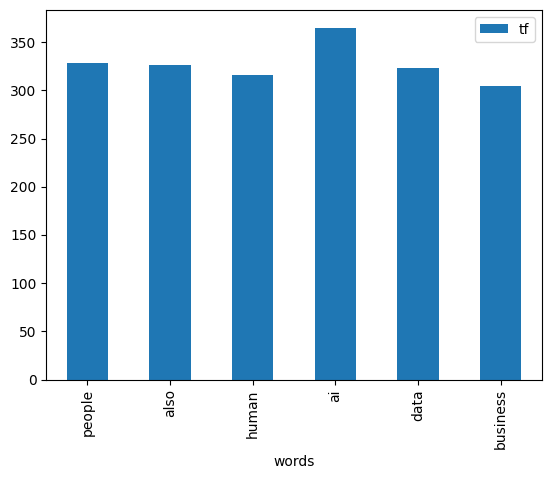

In [24]:
tf[tf["tf"] > 300].plot.bar(x="words", y="tf")
plt.show()

In [25]:
# check every row and join with these with a space
text = " ".join(i for i in df.Text)

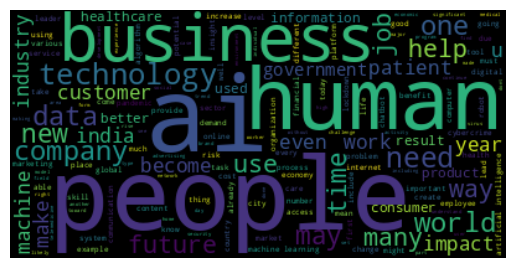

In [26]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

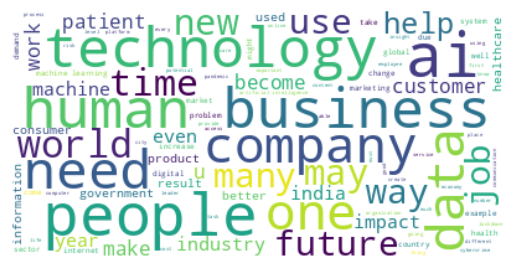

In [27]:
# configure the graph
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
df["Text"].head()

0    seen huge development dependence people techno...
1    throughout history industrial revolution 18th ...
2    span decade internet undergone transformation ...
3    way live work communicate changed result rapid...
4    year 2040 poised witness continued revolution ...
Name: Text, dtype: object

In [29]:
nltk.download('vader_lexicon')  # pre-trained model for sentiment analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [30]:
# Example 1
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Movie was good")

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [31]:
# Example 2
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [32]:
df["Text"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.036, 'neu': 0.689, 'pos': 0.275, 'co...
1    {'neg': 0.056, 'neu': 0.716, 'pos': 0.228, 'co...
2    {'neg': 0.089, 'neu': 0.735, 'pos': 0.176, 'co...
3    {'neg': 0.189, 'neu': 0.656, 'pos': 0.155, 'co...
4    {'neg': 0.006, 'neu': 0.801, 'pos': 0.192, 'co...
5    {'neg': 0.024, 'neu': 0.782, 'pos': 0.194, 'co...
6    {'neg': 0.202, 'neu': 0.671, 'pos': 0.127, 'co...
7    {'neg': 0.052, 'neu': 0.789, 'pos': 0.159, 'co...
8    {'neg': 0.139, 'neu': 0.641, 'pos': 0.219, 'co...
9    {'neg': 0.195, 'neu': 0.584, 'pos': 0.221, 'co...
Name: Text, dtype: object

In [33]:
df["Text"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0    0.9993
1    0.9992
2    0.9958
3   -0.9857
4    0.9964
5    0.9994
6   -0.9970
7    0.9944
8    0.9938
9    0.9675
Name: Text, dtype: float64

In [34]:
# save the scores as a new column
df["POSITIVE SCORE"] = df["Text"].apply(lambda x: sia.polarity_scores(x)["pos"])
df["NEGATIVE SCORE"] = df["Text"].apply(lambda x: sia.polarity_scores(x)["neg"])
df["POLARITY SCORE"] = df["Text"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [35]:
df

,URL_ID,URL,Title,Text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...,0.275,0.036,0.9993
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...,0.228,0.056,0.9992
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decade internet undergone transformation ...,0.176,0.089,0.9958
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...,0.155,0.189,-0.9857
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...,0.192,0.006,0.9964
...,...,...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemic general direct indirect cost associat...,0.118,0.192,-0.9932
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knee business shut trave...,0.151,0.127,0.8934
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicraft art making craft hand india called ...,0.158,0.035,0.9719
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...,0.216,0.033,0.9954


In [37]:
def subject(x):
  blob = TextBlob(x)

  # get the subjectivity score of the text
  subjectivity = blob.sentiment.subjectivity

  # return the subjectivity score
  return subjectivity

In [38]:
df["Subjectivity"] = df["Text"].apply(lambda x: subject(x))



In [39]:
df

,URL_ID,URL,Title,Text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,Subjectivity
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...,0.275,0.036,0.9993,0.572691
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...,0.228,0.056,0.9992,0.402226
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decade internet undergone transformation ...,0.176,0.089,0.9958,0.409961
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...,0.155,0.189,-0.9857,0.396118
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...,0.192,0.006,0.9964,0.498010
...,...,...,...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemic general direct indirect cost associat...,0.118,0.192,-0.9932,0.381806
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knee business shut trave...,0.151,0.127,0.8934,0.431298
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicraft art making craft hand india called ...,0.158,0.035,0.9719,0.438141
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...,0.216,0.033,0.9954,0.353574


In [55]:
def avg_sentence_len(text):
  sentences = text.split(".") #split the text into a list of sentences.
  words = text.split(" ") #split the input text into a list of separate words
  if(sentences[len(sentences)-1]==""): #if the last value in sentences is an empty string
    average_sentence_length = len(words) / len(sentences)-1
  else:
    average_sentence_length = len(words) / len(sentences)
  return average_sentence_length #returning avg length of sentence

In [56]:
df['AVG SENTENCE LENGTH'] = df['Text'].apply(lambda x: avg_sentence_len(x))

In [57]:
df

,URL_ID,URL,Title,Text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,Subjectivity,AVG SENTENCE LENGTH
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...,0.275,0.036,0.9993,0.572691,582.0
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...,0.228,0.056,0.9992,0.402226,794.0
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decade internet undergone transformation ...,0.176,0.089,0.9958,0.409961,606.0
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...,0.155,0.189,-0.9857,0.396118,584.0
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...,0.192,0.006,0.9964,0.498010,374.0
...,...,...,...,...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemic general direct indirect cost associat...,0.118,0.192,-0.9932,0.381806,588.0
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knee business shut trave...,0.151,0.127,0.8934,0.431298,482.0
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicraft art making craft hand india called ...,0.158,0.035,0.9719,0.438141,203.0
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...,0.216,0.033,0.9954,0.353574,333.0


In [60]:
import nltk
import nltk
nltk.download('punkt')

def calculate_percentage_of_complex_words(text):
  # Tokenize the text.
  tokens = nltk.word_tokenize(text)

  # Count the number of complex words.
  complex_word_count = 0
  for token in tokens:
    if len(token) >= 3:
      complex_word_count += 1

  # Calculate the percentage of complex words.
  percentage_of_complex_words = complex_word_count / len(tokens) * 100

  return percentage_of_complex_words
df['PERCENTAGE OF COMPLEX WORDS'] = df['Text'].apply(lambda x: calculate_percentage_of_complex_words(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
df

,URL_ID,URL,Title,Text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,Subjectivity,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...,0.275,0.036,0.9993,0.572691,582.0,98.627787
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...,0.228,0.056,0.9992,0.402226,794.0,98.992443
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decade internet undergone transformation ...,0.176,0.089,0.9958,0.409961,606.0,99.174917
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...,0.155,0.189,-0.9857,0.396118,584.0,99.315068
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...,0.192,0.006,0.9964,0.498010,374.0,99.732620
...,...,...,...,...,...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemic general direct indirect cost associat...,0.118,0.192,-0.9932,0.381806,588.0,98.129252
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knee business shut trave...,0.151,0.127,0.8934,0.431298,482.0,98.136646
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicraft art making craft hand india called ...,0.158,0.035,0.9719,0.438141,203.0,98.029557
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...,0.216,0.033,0.9954,0.353574,333.0,96.706587


In [62]:
import re

def fog_index(text):

  sentences = re.split(r'[.!?]', text)

  words = len(text.split())

  complex_words = 0
  for word in text.split():
    if len(word) >= 3 and word.isalpha():
      complex_words += 1

  average_sentence_length = words / len(sentences)

  percentage_of_complex_words = complex_words / words

  # Calculate the Fog Index.
  fog_index = 0.4 * (average_sentence_length + percentage_of_complex_words)

  return fog_index


# Example usage:
df['FOG INDEX'] = df['Text'].apply(lambda x: fog_index(x))

In [63]:
df

,URL_ID,URL,Title,Text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,Subjectivity,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...,0.275,0.036,0.9993,0.572691,582.0,98.627787,233.190378
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...,0.228,0.056,0.9992,0.402226,794.0,98.992443,317.992443
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decade internet undergone transformation ...,0.176,0.089,0.9958,0.409961,606.0,99.174917,242.792739
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...,0.155,0.189,-0.9857,0.396118,584.0,99.315068,233.988356
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...,0.192,0.006,0.9964,0.498010,374.0,99.732620,149.994652
...,...,...,...,...,...,...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemic general direct indirect cost associat...,0.118,0.192,-0.9932,0.381806,588.0,98.129252,235.585714
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knee business shut trave...,0.151,0.127,0.8934,0.431298,482.0,98.136646,193.192531
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicraft art making craft hand india called ...,0.158,0.035,0.9719,0.438141,203.0,98.029557,81.588177
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...,0.216,0.033,0.9954,0.353574,333.0,96.706587,133.572372


In [68]:

def avg_number_of_word_per_sentence(x):
  sentences = x

  # Tokenize the sentences
  tokens = nltk.word_tokenize(sentences)

  # Count the number of words and sentences
  num_words = len(tokens)
  num_sentences = len(sentences)

  # Calculate the average number of words per sentence
  avg_words_per_sentence = num_words / num_sentences

  # Print the average number of words per sentence
  return avg_words_per_sentence

df['AVG NUMBER OF WORDS PER SENTENCE'] = df['Text'].apply(lambda x: avg_number_of_word_per_sentence(x))

In [69]:
df

,URL_ID,URL,Title,Text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,Subjectivity,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...,0.275,0.036,0.9993,0.572691,582.0,98.627787,233.190378,0.143349
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...,0.228,0.056,0.9992,0.402226,794.0,98.992443,317.992443,0.126152
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decade internet undergone transformation ...,0.176,0.089,0.9958,0.409961,606.0,99.174917,242.792739,0.114426
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...,0.155,0.189,-0.9857,0.396118,584.0,99.315068,233.988356,0.119184
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...,0.192,0.006,0.9964,0.498010,374.0,99.732620,149.994652,0.125757
...,...,...,...,...,...,...,...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemic general direct indirect cost associat...,0.118,0.192,-0.9932,0.381806,588.0,98.129252,235.585714,0.129658
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knee business shut trave...,0.151,0.127,0.8934,0.431298,482.0,98.136646,193.192531,0.139113
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicraft art making craft hand india called ...,0.158,0.035,0.9719,0.438141,203.0,98.029557,81.588177,0.134437
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...,0.216,0.033,0.9954,0.353574,333.0,96.706587,133.572372,0.147788


In [75]:
import textstat  # For readability metrics
import nltk  # For word tokenization and part-of-speech tagging
nltk.download('averaged_perceptron_tagger')  # Download POS tagger

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [85]:
def is_complex_word(word):
    return (
        len(word) >= 7  # Words with 7 or more characters
        or textstat.syllable_count(word) >= 7  # Words with 3 or more syllables
        or word.isupper()  # All uppercase words
        or nltk.pos_tag([word])[0][1] in ["NNP", "NNPS"])

df['COMPLEX WORD COUNT'] = df['Text'].apply(lambda x: sum(1 for word in x if is_complex_word(word)))

In [89]:
df['WORD COUNT'] = df['Text'].apply(lambda x: len(set(x.split())))

In [90]:
df

,URL_ID,URL,Title,Text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,Subjectivity,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...,0.275,0.036,0.9993,0.572691,582.0,98.627787,233.190378,0.143349,0,250
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...,0.228,0.056,0.9992,0.402226,794.0,98.992443,317.992443,0.126152,0,469
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decade internet undergone transformation ...,0.176,0.089,0.9958,0.409961,606.0,99.174917,242.792739,0.114426,0,307
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...,0.155,0.189,-0.9857,0.396118,584.0,99.315068,233.988356,0.119184,0,349
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...,0.192,0.006,0.9964,0.498010,374.0,99.732620,149.994652,0.125757,0,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemic general direct indirect cost associat...,0.118,0.192,-0.9932,0.381806,588.0,98.129252,235.585714,0.129658,0,359
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knee business shut trave...,0.151,0.127,0.8934,0.431298,482.0,98.136646,193.192531,0.139113,0,259
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicraft art making craft hand india called ...,0.158,0.035,0.9719,0.438141,203.0,98.029557,81.588177,0.134437,0,133
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...,0.216,0.033,0.9954,0.353574,333.0,96.706587,133.572372,0.147788,0,202


In [91]:
!pip install syllables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [93]:
import syllables

def count_syllables(word):


  return syllables.estimate(word)

In [94]:
df['SYLLABLE PER WORD'] = df['Text'].apply(lambda x: count_syllables(x))

In [95]:
df

,URL_ID,URL,Title,Text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,Subjectivity,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...,0.275,0.036,0.9993,0.572691,582.0,98.627787,233.190378,0.143349,0,250,1251
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...,0.228,0.056,0.9992,0.402226,794.0,98.992443,317.992443,0.126152,0,469,2006
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decade internet undergone transformation ...,0.176,0.089,0.9958,0.409961,606.0,99.174917,242.792739,0.114426,0,307,1714
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...,0.155,0.189,-0.9857,0.396118,584.0,99.315068,233.988356,0.119184,0,349,1536
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...,0.192,0.006,0.9964,0.498010,374.0,99.732620,149.994652,0.125757,0,241,898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemic general direct indirect cost associat...,0.118,0.192,-0.9932,0.381806,588.0,98.129252,235.585714,0.129658,0,359,1401
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knee business shut trave...,0.151,0.127,0.8934,0.431298,482.0,98.136646,193.192531,0.139113,0,259,1037
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicraft art making craft hand india called ...,0.158,0.035,0.9719,0.438141,203.0,98.029557,81.588177,0.134437,0,133,457
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...,0.216,0.033,0.9954,0.353574,333.0,96.706587,133.572372,0.147788,0,202,678


In [101]:
import nltk

# Define a list of personal pronouns
def count_personal_pronouns(text):
    pronouns = []
    for sentence in nltk.sent_tokenize(text):
        for word, tag in nltk.pos_tag(nltk.word_tokenize(sentence)):
            if tag in ["PRP", "PRP$"]:
                pronouns.append(word)
    return pronouns, len(pronouns)


In [102]:
df['PERSONAL PRONOUNS'] = df['Text'].apply(lambda x: count_personal_pronouns(x))

In [103]:
df

,URL_ID,URL,Title,Text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,Subjectivity,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...,0.275,0.036,0.9993,0.572691,582.0,98.627787,233.190378,0.143349,0,250,1251,"([], 0)"
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...,0.228,0.056,0.9992,0.402226,794.0,98.992443,317.992443,0.126152,0,469,2006,"([], 0)"
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decade internet undergone transformation ...,0.176,0.089,0.9958,0.409961,606.0,99.174917,242.792739,0.114426,0,307,1714,"([delf], 1)"
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...,0.155,0.189,-0.9857,0.396118,584.0,99.315068,233.988356,0.119184,0,349,1536,"([], 0)"
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...,0.192,0.006,0.9964,0.498010,374.0,99.732620,149.994652,0.125757,0,241,898,"([delf], 1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemic general direct indirect cost associat...,0.118,0.192,-0.9932,0.381806,588.0,98.129252,235.585714,0.129658,0,359,1401,"([], 0)"
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knee business shut trave...,0.151,0.127,0.8934,0.431298,482.0,98.136646,193.192531,0.139113,0,259,1037,"([], 0)"
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicraft art making craft hand india called ...,0.158,0.035,0.9719,0.438141,203.0,98.029557,81.588177,0.134437,0,133,457,"([], 0)"
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...,0.216,0.033,0.9954,0.353574,333.0,96.706587,133.572372,0.147788,0,202,678,"([], 0)"


In [104]:
import nltk

def average_word_length(text):
  tokens = nltk.word_tokenize(text)

  num_words = len(tokens)

  num_characters = sum(len(token) for token in tokens)
  average_word_length = num_characters / num_words

  return average_word_length


df['AVG WORD LENGTH'] = df['Text'].apply(lambda x: average_word_length(x))

In [105]:
df

,URL_ID,URL,Title,Text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,Subjectivity,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,seen huge development dependence people techno...,0.275,0.036,0.9993,0.572691,582.0,98.627787,233.190378,0.143349,0,250,1251,"([], 0)",5.979417
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,throughout history industrial revolution 18th ...,0.228,0.056,0.9992,0.402226,794.0,98.992443,317.992443,0.126152,0,469,2006,"([], 0)",6.928212
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand's Evolution, Communication Imp...",span decade internet undergone transformation ...,0.176,0.089,0.9958,0.409961,606.0,99.174917,242.792739,0.114426,0,307,1714,"([delf], 1)",7.740924
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,way live work communicate changed result rapid...,0.155,0.189,-0.9857,0.396118,584.0,99.315068,233.988356,0.119184,0,349,1536,"([], 0)",7.392123
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,year 2040 poised witness continued revolution ...,0.192,0.006,0.9964,0.498010,374.0,99.732620,149.994652,0.125757,0,241,898,"([delf], 1)",6.954545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,epidemic general direct indirect cost associat...,0.118,0.192,-0.9932,0.381806,588.0,98.129252,235.585714,0.129658,0,359,1401,"([], 0)",6.714286
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,covid 19 bought world knee business shut trave...,0.151,0.127,0.8934,0.431298,482.0,98.136646,193.192531,0.139113,0,259,1037,"([], 0)",6.192547
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,handicraft art making craft hand india called ...,0.158,0.035,0.9719,0.438141,203.0,98.029557,81.588177,0.134437,0,133,457,"([], 0)",6.443350
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,friday december 29 2023 sign join search homed...,0.216,0.033,0.9954,0.353574,333.0,96.706587,133.572372,0.147788,0,202,678,"([], 0)",5.772455


In [106]:
df.to_excel('output.xlsx')